f(x) = 1.3534440261504958e-06*x*x + 0.00029789922461897085*x + 1.3534440261504958e-06 (Formula All-Pairs curve fit)
g(x) = 0.16569700276980995*x + 0.0003614110112997129 (Formula for Linked-Cell fit)


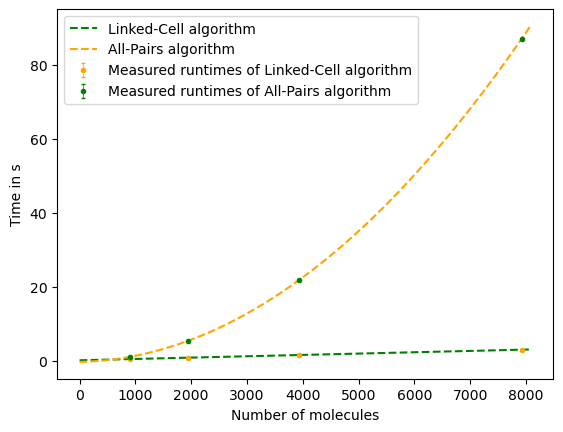

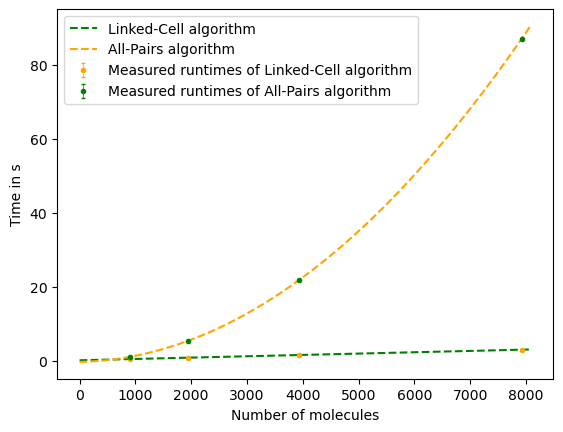

In [49]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import optimize as opt
from scipy import constants
from math import *

xValues = [900, 1936, 3936, 7921]

#time in ms
linkedCellAv = [490, 864, 1592, 3027]
linkedCellMin = [487, 860, 1583, 3021]
linkedCellMax = [497, 868, 1609, 3037]
linkedCellError = []
for i in range(4):
    linkedCellError.append((linkedCellMax[i] - linkedCellMin[i]) /2)

noLiCeAv = [1153, 5253, 21923, 86991]
noLiCeMin = [1151, 5233, 21814, 96836]
noLiCeMax = [1155, 5265, 21962, 97179]
noLiCeError= []
for i in range(4):
    noLiCeError.append((noLiCeMax[i] - noLiCeMin[i]) /2)

for i in range(4):
    noLiCeAv[i] = noLiCeAv[i]/1000
    noLiCeMin[i] = noLiCeError[i]/1000
    noLiCeMax[i] = noLiCeMax[i]/1000
    noLiCeError[i] = noLiCeError[i]/1000

    linkedCellAv[i] = linkedCellAv[i]/1000
    linkedCellMin[i] = linkedCellMin[i]/1000
    linkedCellMax[i] = linkedCellMax[i]/1000
    linkedCellError[i] = linkedCellError[i]/1000

fig, ax = plt.subplots()

#plot measured points
ax.errorbar(
    xValues,
    linkedCellAv,
    yerr = linkedCellError,
    marker = '.',
    color ='orange',
    markerfacecolor = 'orange',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="Measured runtimes of Linked-Cell algorithm"
)

ax.errorbar(
    xValues,
    noLiCeAv,
    yerr = noLiCeError,
    marker = '.',
    markerfacecolor = 'green',
    color = 'green',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="Measured runtimes of All-Pairs algorithm"
)



def linear(x, m , b):
    return m*x + b


def quadratic(x, a, b, c):
    return a*x*x + b*x + c

#fit curve for Cell (expected to be linear)
startParameterL = 1,1
poptL, pcovL = opt.curve_fit(
    linear,
    xValues,
    linkedCellAv,
    p0 = startParameterL
)

#fit curve for no Linked-Cell (expected to be quadratic)
startParameterQ = 1,1,1
poptQ, pcovQ = opt.curve_fit(
    quadratic,
    xValues,
    noLiCeAv,
    p0 = startParameterQ
)

#plot linear fit
x_fit = np.linspace(0, max(xValues)*1.02, 200)
ax.plot(
    x_fit,
    linear(x_fit, *poptL),
    label = "Linked-Cell algorithm",
    marker = '',
    linestyle = 'dashed',
    markerfacecolor ='green',
    color = 'green'
)

ax.plot(
    x_fit,
    quadratic(x_fit, *poptQ),
    label = "All-Pairs algorithm",
    marker = '',
    linestyle = 'dashed',
    markerfacecolor = 'orange',
    color = 'orange',
)

print("f(x) = " + str(poptQ[0]) + "*x*x + " +  str(poptQ[1])  + "*x + " + str(poptQ[0]) + " (Formula All-Pairs curve fit)")
print("g(x) = " + str(poptL[1])  + "*x + " + str(poptL[0]) + " (Formula for Linked-Cell fit)")

ax.set_xlabel("Number of molecules")
ax.set_ylabel("Time in s")

ax.legend()
fig.savefig('plot.pdf')
fig



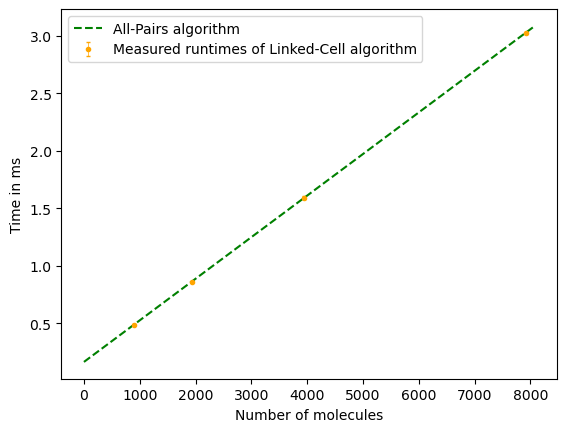

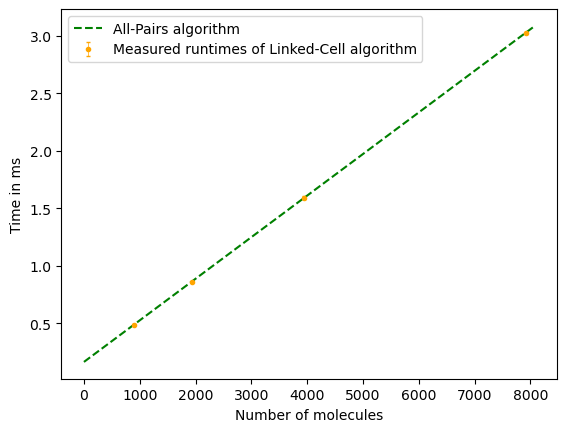

In [50]:
# this one assumes the notebook on top

fig2, ax2 = plt.subplots()

for i in range(4):
    linkedCellAv[i] = linkedCellAv[i]*1000
    linkedCellError[i] = linkedCellError[i]*1000

#plot measured points
ax2.errorbar(
    xValues,
    linkedCellAv,
    yerr = linkedCellError,
    marker = '.',
    color ='orange',
    markerfacecolor = 'orange',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="Measured runtimes of Linked-Cell algorithm"
)

startParameterL = 1,1
poptL2, pcovL2 = opt.curve_fit(
    linear,
    xValues,
    linkedCellAv,
    p0 = startParameterL
)

ax2.plot(
    x_fit,
    linear(x_fit, *poptL2),
    label = "All-Pairs algorithm",
    marker = '',
    linestyle = 'dashed',
    markerfacecolor = 'green',
    color = 'green',
)



ax2.set_xlabel("Number of molecules")
ax2.set_ylabel("Time in ms")

ax2.legend()
fig2.savefig('plotJustLiCe.pdf')
fig2
